In [1]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (11.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [2]:
!pip install pytesseract

In [3]:
!mkdir tessdata

In [4]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata

--2024-04-10 22:52:35--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2024-04-10 22:52:35--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15336931 (15M) [application/octet-stream]
Saving to: ‘./tessdata/por.traineddata’

./tessdata/por.trai 100%[===================>]  14.63M  --.-KB/s    in 0.1s    

2024-04-10 22:52:35 (128 MB/s) - ‘./tessdata/por.traineddata’ saved [15336931/15336931]



In [5]:
import cv2
import pytesseract

In [6]:
cv2.__version__

'4.8.0'

In [7]:
pytesseract.__version__

'0.3.10'

In [8]:
imagem = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imagens placa de carro/trecho_livro.png')

In [9]:
from google.colab.patches import cv2_imshow

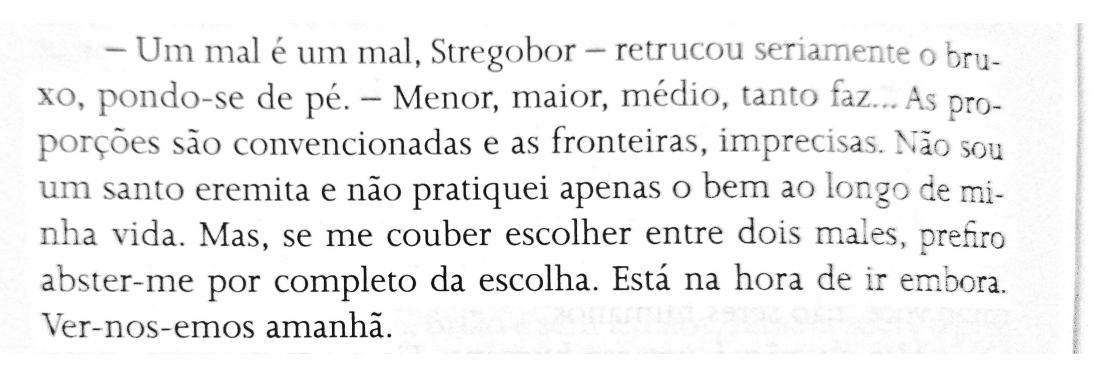

In [10]:
cv2_imshow(imagem)

In [11]:
texto = pytesseract.image_to_string(imagem)
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente 0 bry.
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... A
porgdes sao convencionadas e as fronteiras, imprecisas.
um santo eremita e nao pratiquei apenas 0 bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro

abster-me por completo da escolha. Esta na hora de ir embora.
Ver-nos-emos amanha.

 

S pro-

40 SOU

 

 



In [12]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [13]:
config_tesseract = '--tessdata-dir tessdata --psm 6'

In [14]:
texto = pytesseract.image_to_string(imagem, lang = 'por', config = config_tesseract)
print(texto)

— Um mal é um mal, Stregobor — retrucou seriamente o bry-
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... As pro-
porções são convencionadas e as fronteiras, imprecisas. Não sou
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro
abster-me por completo da escolha. Está na hora de ir embora. ;
Ver-nos-emos amanhã. |



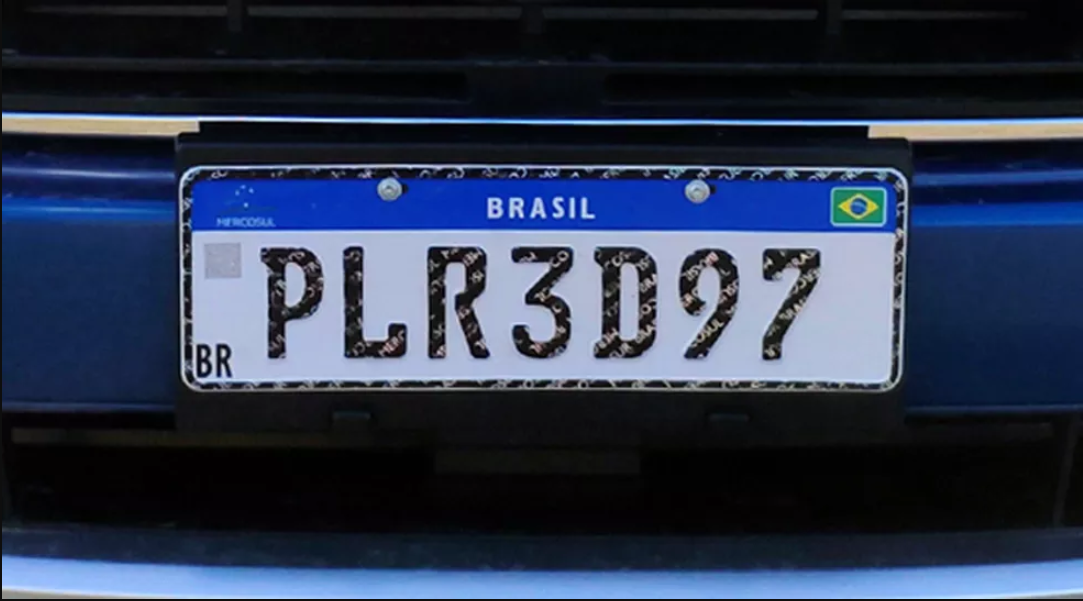

In [15]:
imagem = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imagens placa de carro/placa_carro1.png')
cv2_imshow(imagem)

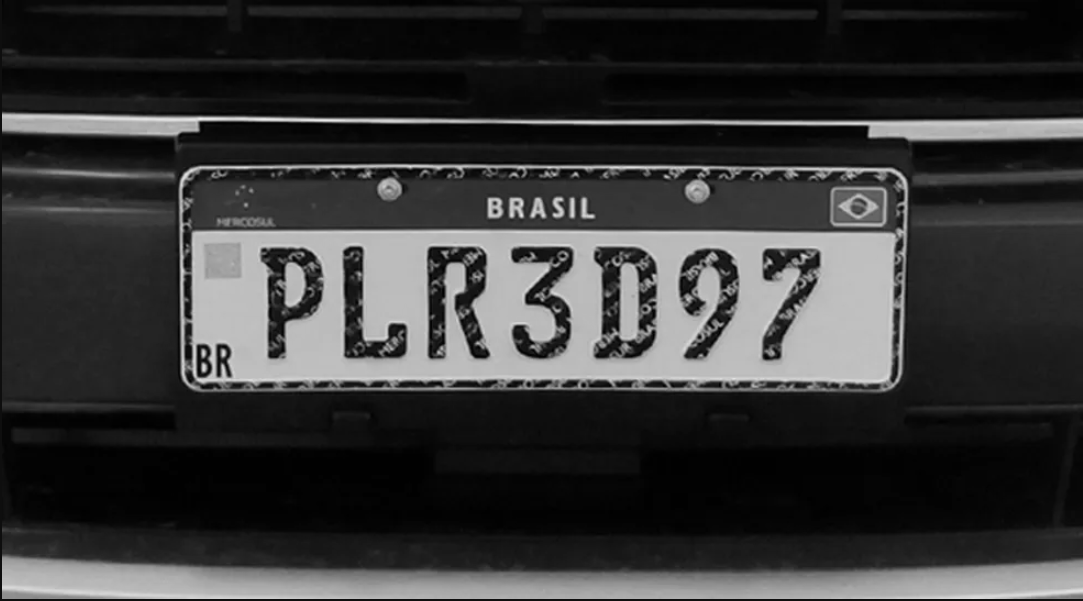

In [16]:
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem)

In [17]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(imagem, lang = 'por', config = config_tesseract)
print(texto)

## Limiarização Simples

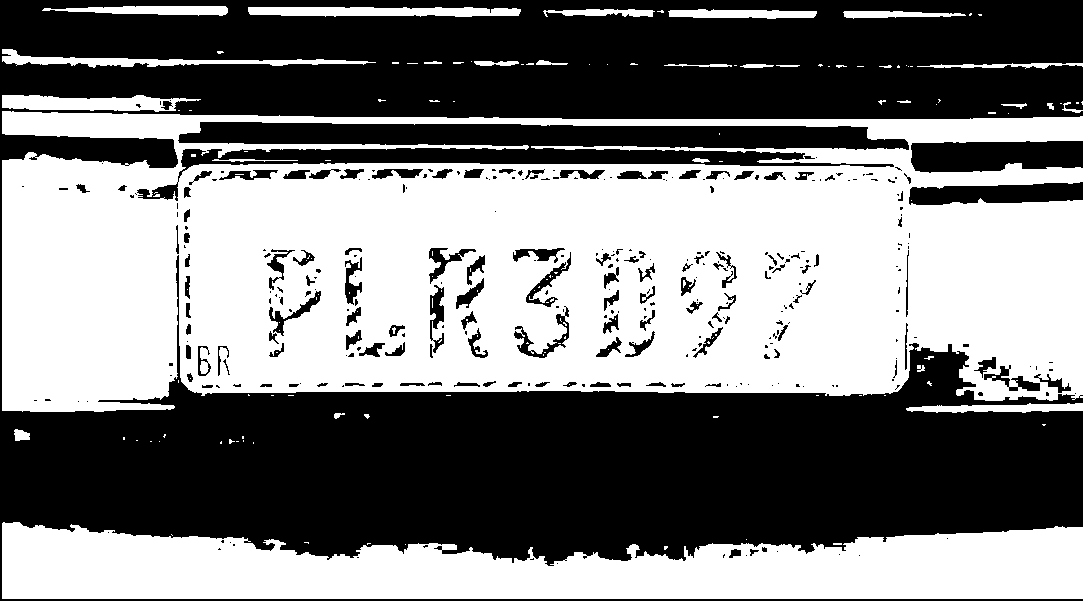

In [18]:
limiar = 25
valor, lim_simples = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
cv2_imshow(lim_simples)

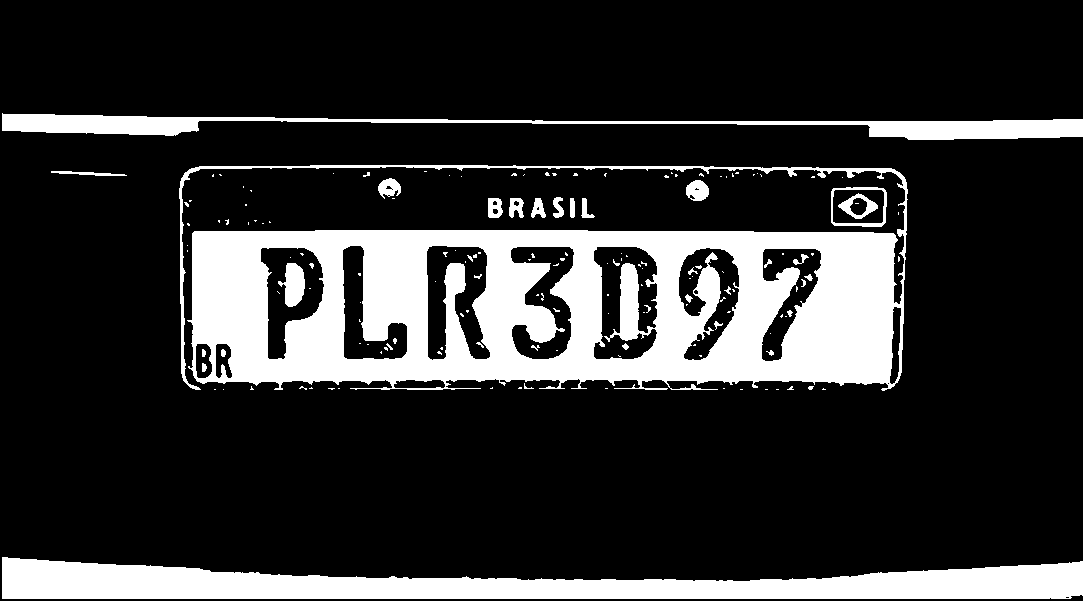

In [19]:
limiar = 127
valor, lim_simples = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
cv2_imshow(lim_simples)

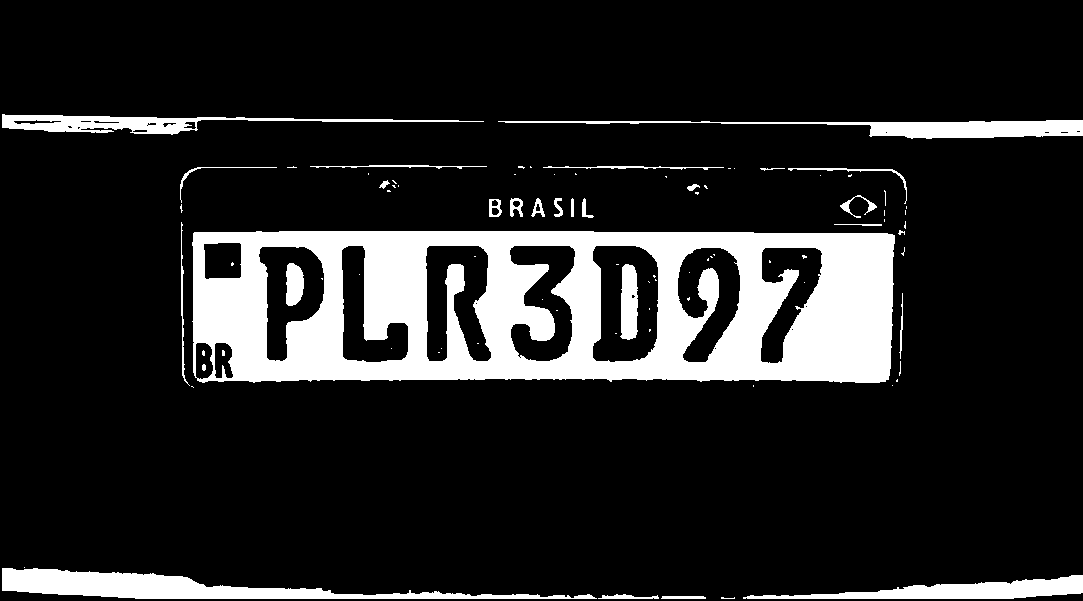

In [20]:
limiar = 170
valor, lim_simples = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
cv2_imshow(lim_simples)

## Limiarização Adaptativa

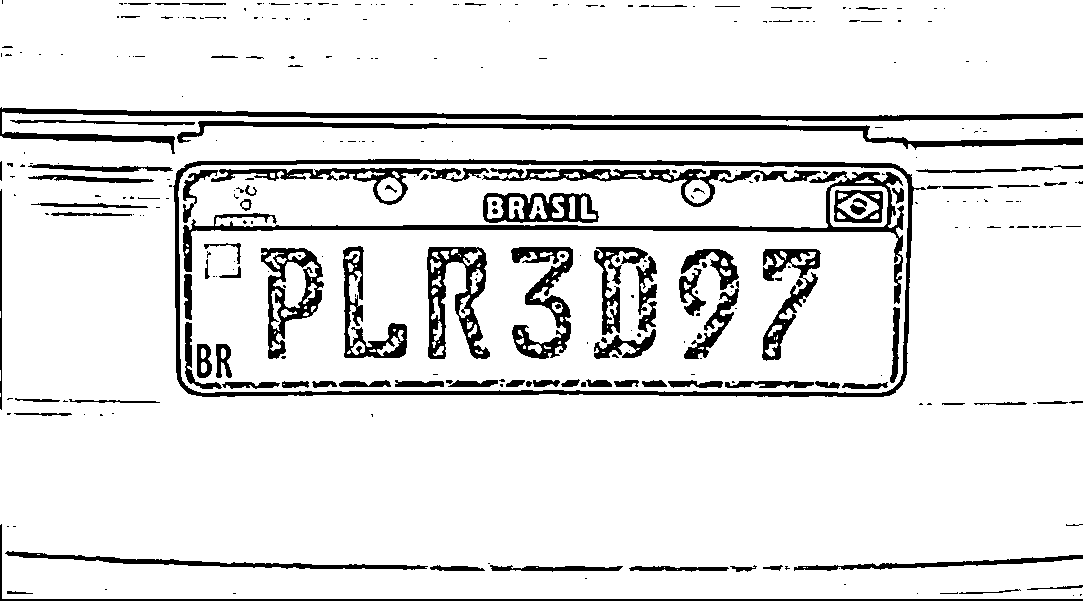

In [21]:
lim_adapt = cv2.adaptiveThreshold(imagem, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
cv2_imshow(lim_adapt)

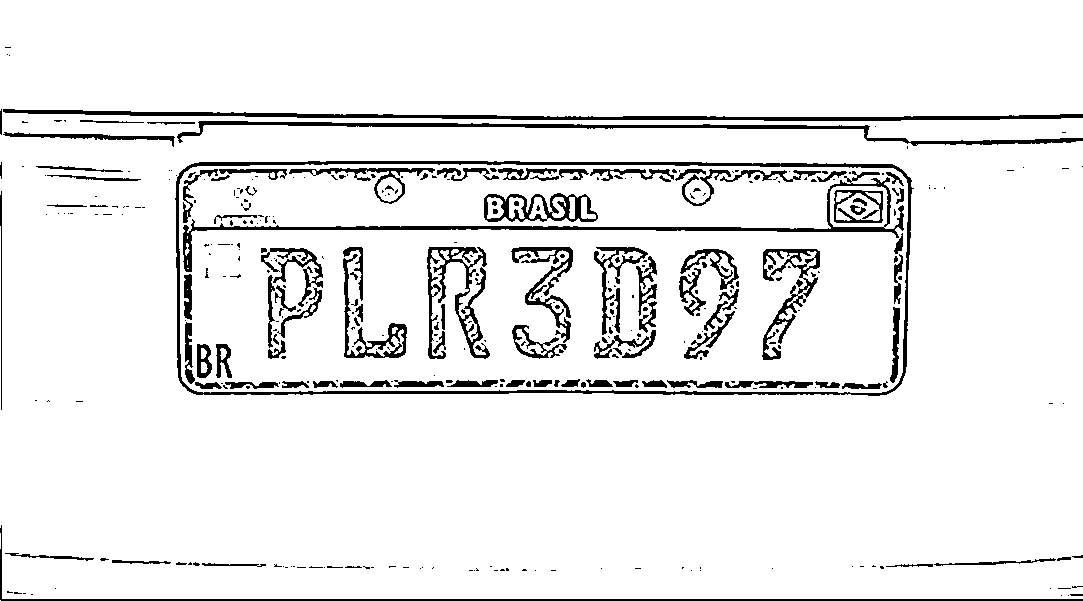

In [22]:
lim_adapt = cv2.adaptiveThreshold(imagem, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
cv2_imshow(lim_adapt)

## Limiarização de Otsu

In [23]:
imagem

array([[ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   3, ...,   5,   5,   5],
       ...,
       [ 14,  14, 144, ..., 122, 121, 120],
       [ 14,  14,  14, ...,  14,  14,  14],
       [ 14,  14,  14, ...,  14,  14,  14]], dtype=uint8)

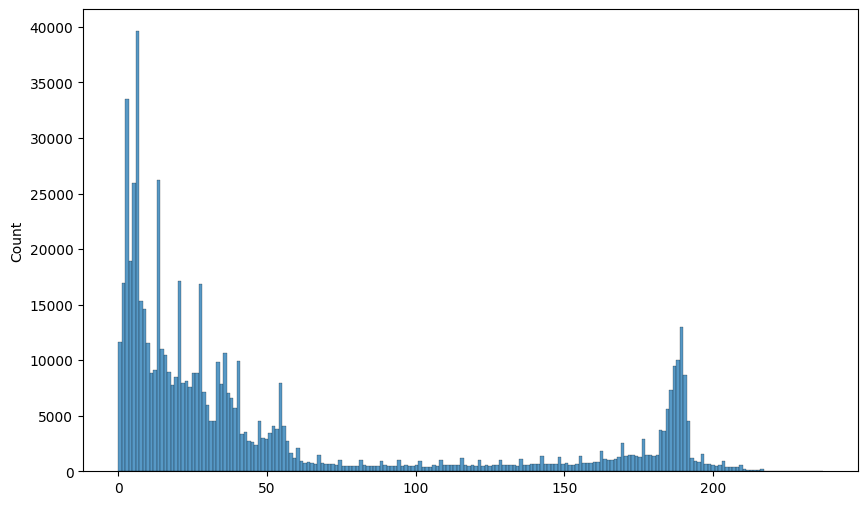

In [24]:
import seaborn as sns
ax = sns.histplot(imagem.flatten())
ax.figure.set_size_inches(10, 6)

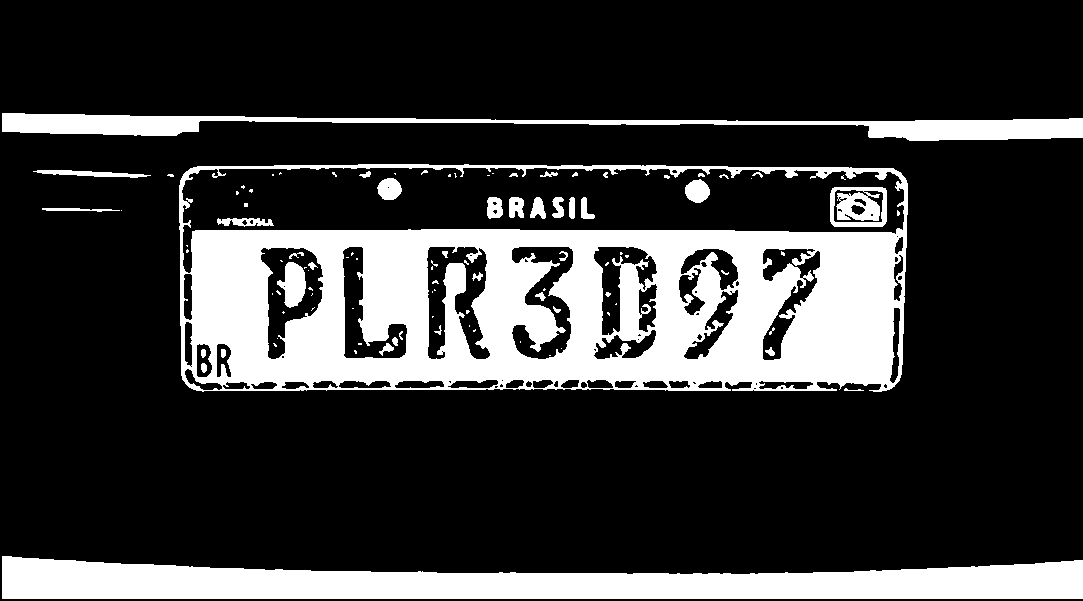

Limiar: 96.0


In [25]:
valor, lim_otsu = cv2.threshold(imagem, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(lim_otsu)
print(f'Limiar: {valor}')

In [26]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(lim_otsu, lang='por', config=config_tesseract)
print(texto)

In [27]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(lim_otsu, lang='por', config=config_tesseract)
print(texto)

## Transformações Morfológicas

### Definição do kernel

In [28]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

### Erosão

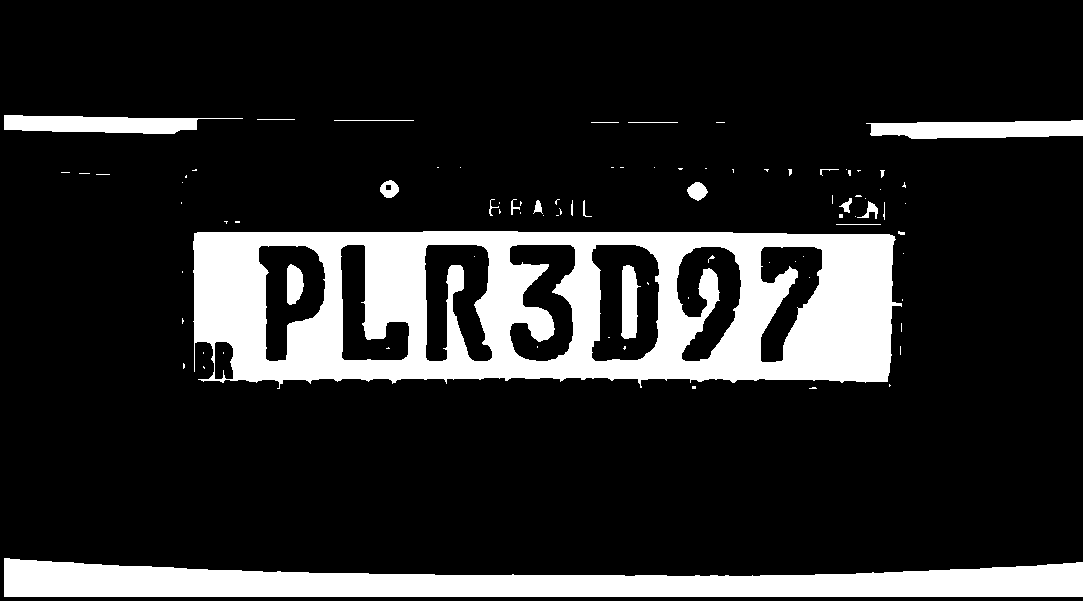

In [29]:
erosao = cv2.erode(lim_otsu, kernel)
cv2_imshow(erosao)

### Dilatação

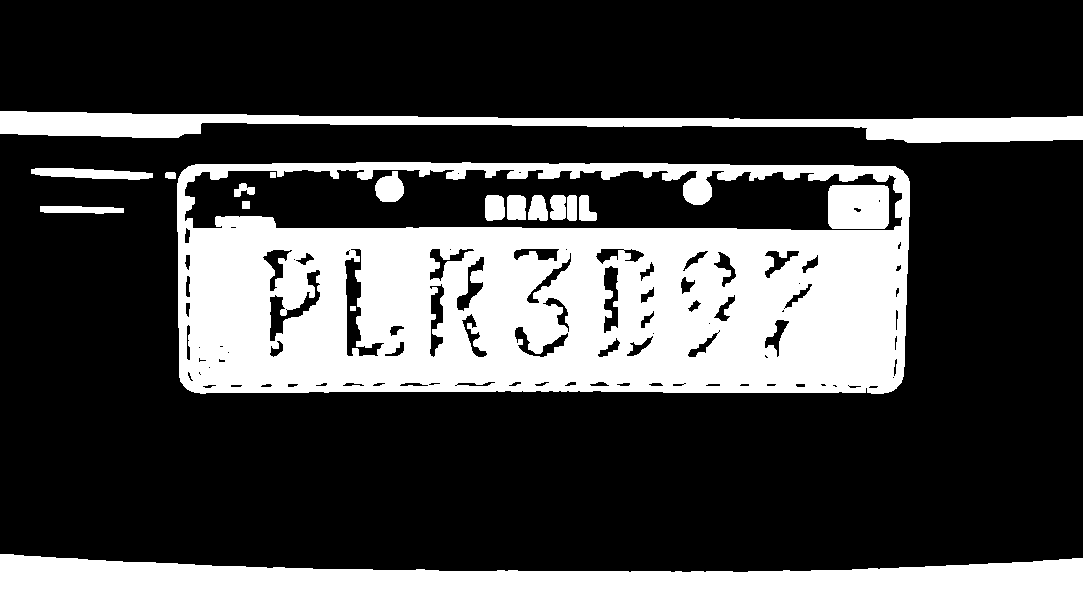

In [30]:
dilatacao = cv2.dilate(lim_otsu, kernel)
cv2_imshow(dilatacao)

### Abertura

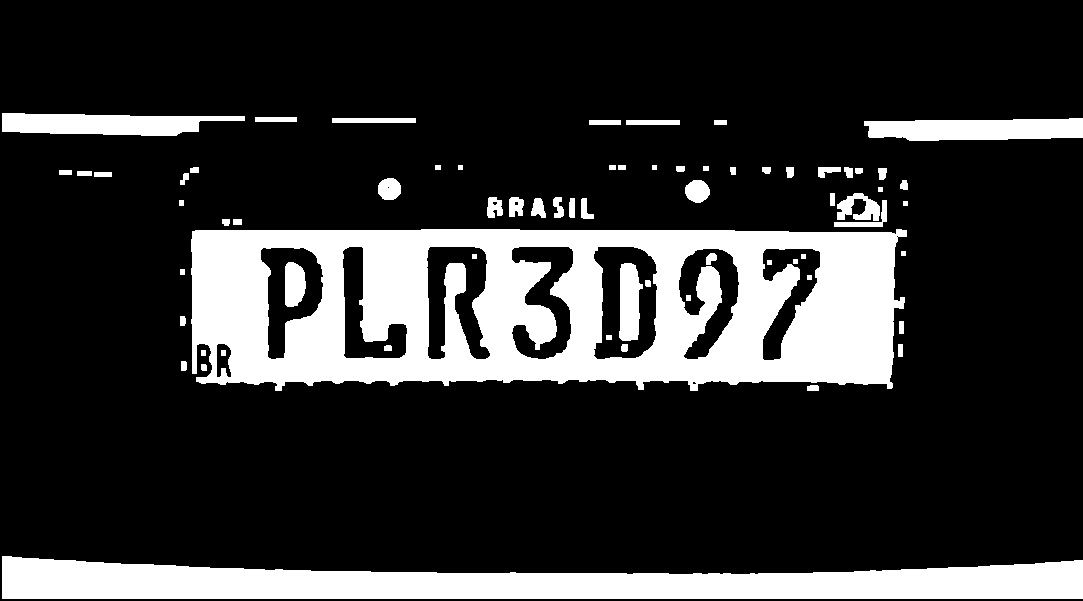

In [31]:
abertura = cv2.morphologyEx(lim_otsu, cv2.MORPH_OPEN, kernel)
cv2_imshow(abertura)

### Fechamento

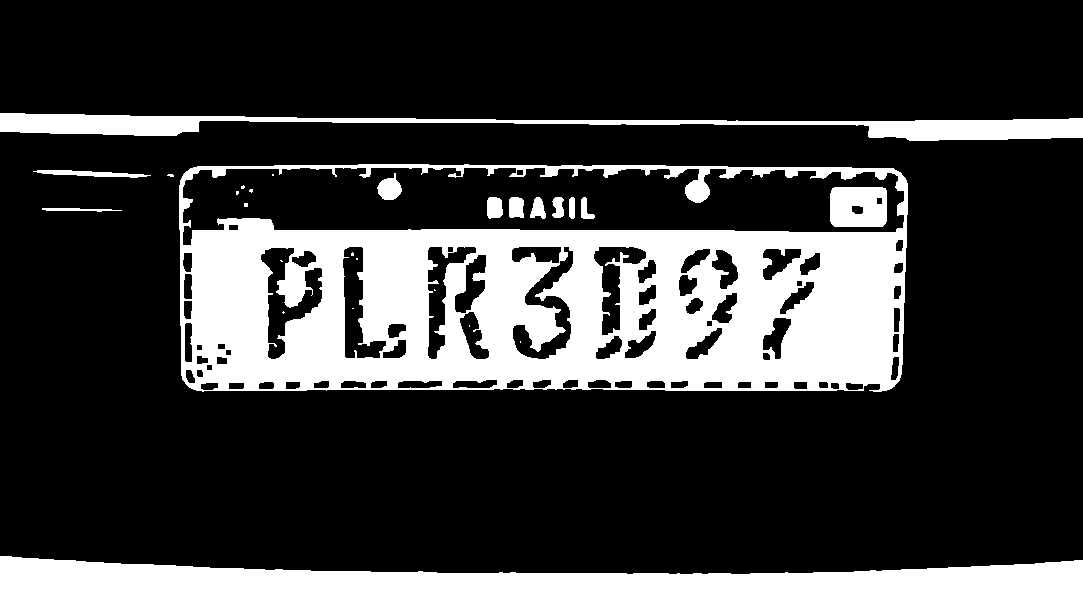

In [32]:
fechamento = cv2.morphologyEx(lim_otsu, cv2.MORPH_CLOSE, kernel)
cv2_imshow(fechamento)

### Gradiente Morfológico

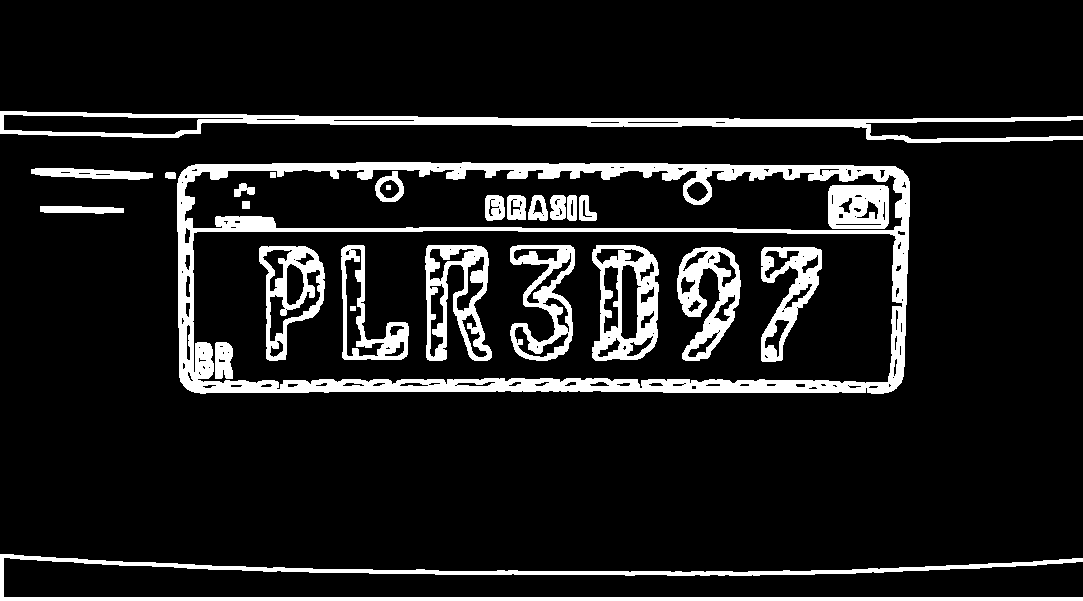

In [33]:
gradiente = cv2.morphologyEx(lim_otsu, cv2.MORPH_GRADIENT, kernel)
cv2_imshow(gradiente)

### Tophat (Cartola)

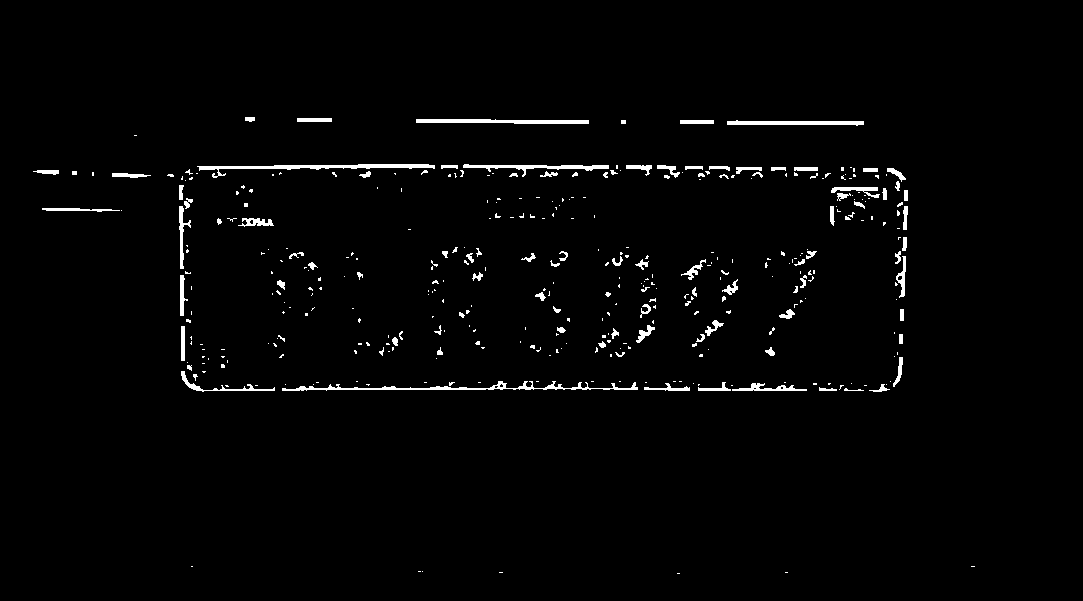

In [34]:
tophat = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel)
cv2_imshow(tophat)

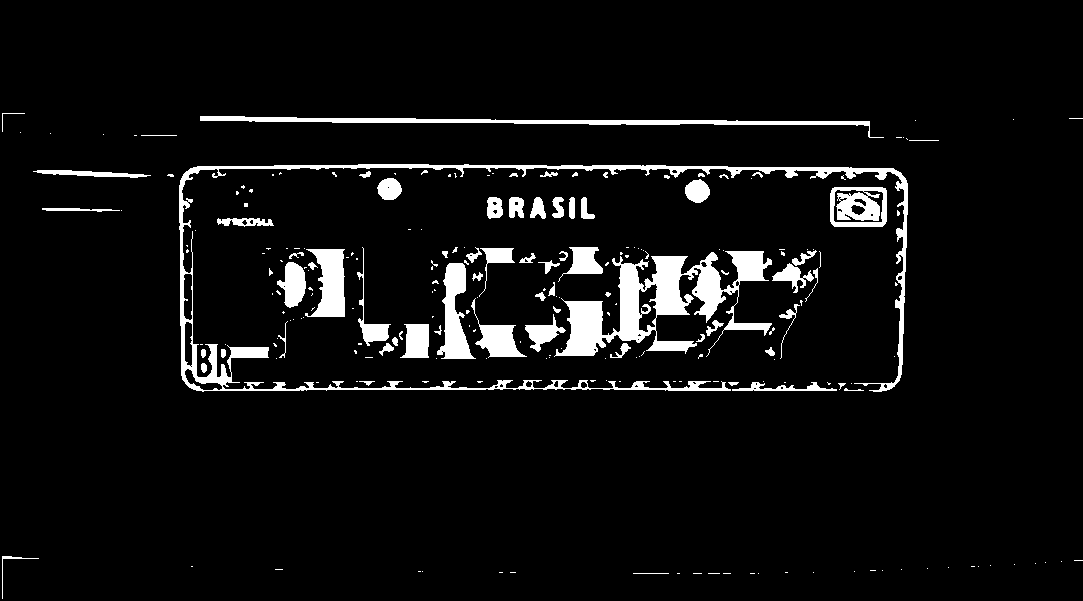

In [35]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 13))
tophat = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel_retangular)
cv2_imshow(tophat)

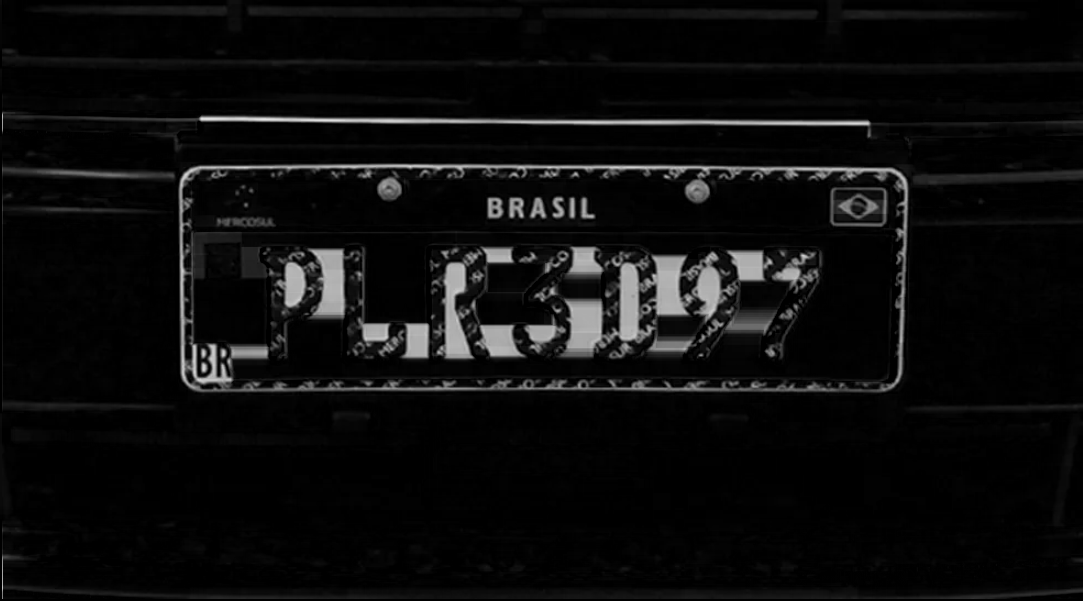

In [36]:
tophat = cv2.morphologyEx(imagem, cv2.MORPH_TOPHAT, kernel_retangular)
cv2_imshow(tophat)

### Blackhat (Chapéu preto)

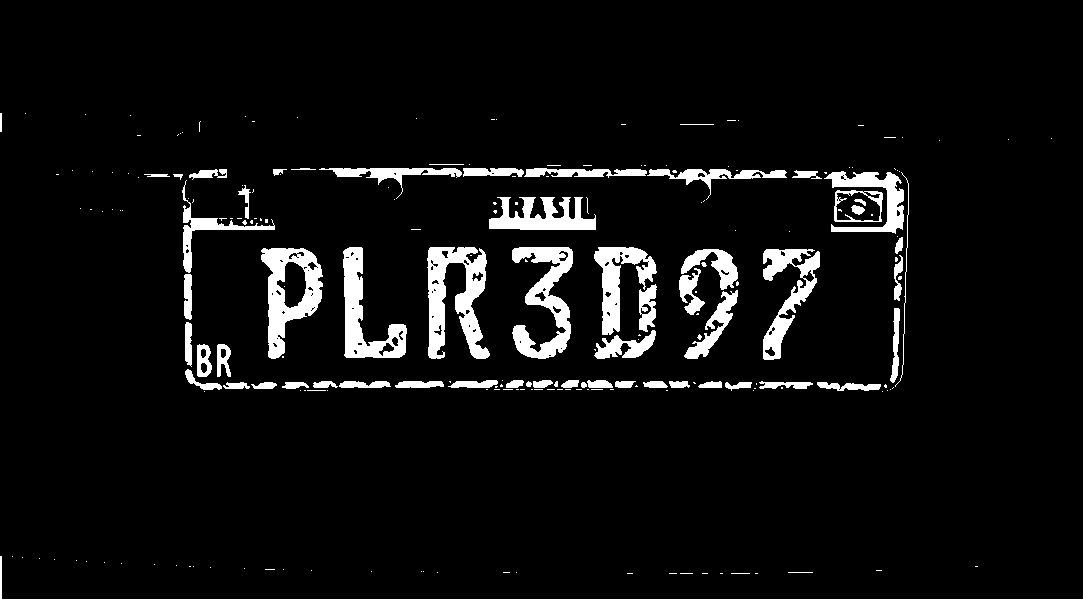

In [37]:
blackhat = cv2.morphologyEx(lim_otsu, cv2.MORPH_BLACKHAT, kernel_retangular)
cv2_imshow(blackhat)

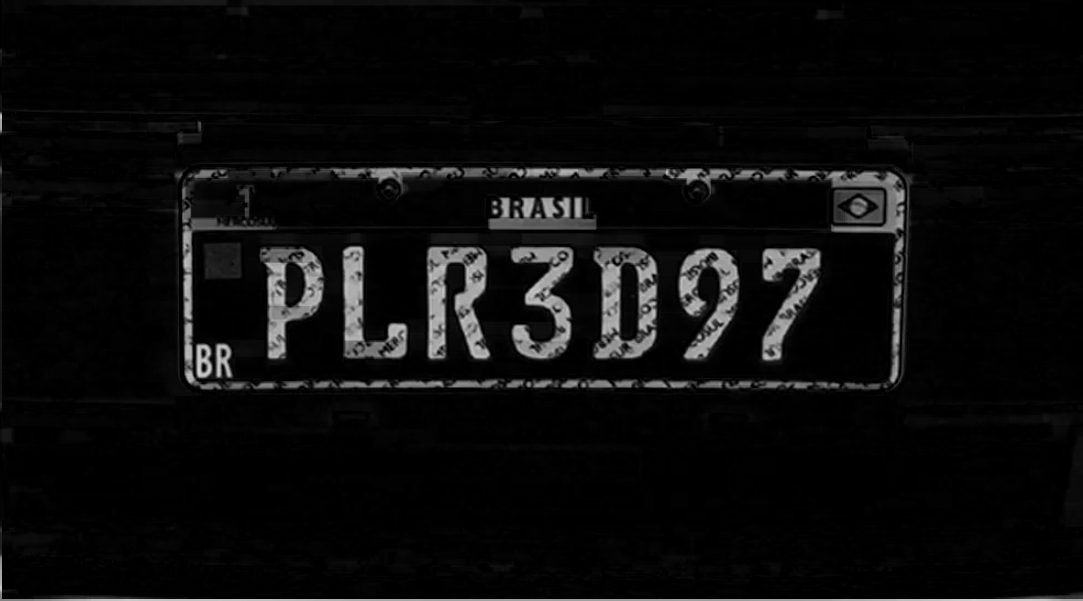

In [38]:
blackhat = cv2.morphologyEx(imagem, cv2.MORPH_BLACKHAT, kernel_retangular)
cv2_imshow(blackhat)

In [39]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(erosao, lang='por', config=config_tesseract)
print(texto)

, PLRSD97 |
— :” NS ss



## Detecção de bordas de Canny

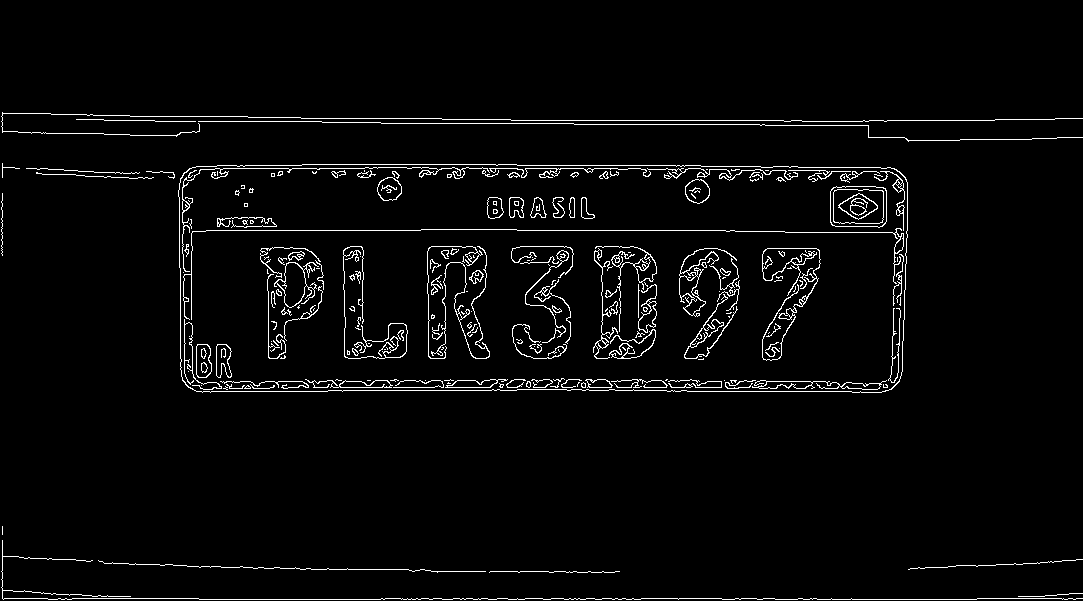

In [45]:
bordas = cv2.Canny(imagem, 100, 200)
cv2_imshow(bordas)

## Detecção dos contornos

In [42]:
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos

(array([[[1069,  593]],
 
        [[1068,  594]],
 
        [[1057,  594]],
 
        [[1056,  595]],
 
        [[1045,  595]],
 
        [[1044,  596]],
 
        [[1018,  596]],
 
        [[1044,  596]],
 
        [[1045,  595]],
 
        [[1056,  595]],
 
        [[1057,  594]],
 
        [[1068,  594]],
 
        [[1069,  593]],
 
        [[1082,  593]]], dtype=int32),
 array([[[490, 571]],
 
        [[489, 572]],
 
        [[490, 571]],
 
        [[517, 571]],
 
        [[518, 572]],
 
        [[519, 572]],
 
        [[520, 571]],
 
        [[548, 571]],
 
        [[549, 572]],
 
        [[553, 572]],
 
        [[554, 571]],
 
        [[565, 571]],
 
        [[566, 572]],
 
        [[568, 572]],
 
        [[569, 571]],
 
        [[570, 572]],
 
        [[572, 572]],
 
        [[573, 571]],
 
        [[576, 571]],
 
        [[577, 572]],
 
        [[587, 572]],
 
        [[588, 571]],
 
        [[590, 571]],
 
        [[591, 572]],
 
        [[601, 572]],
 
        [[602, 571]],
 

## Aproximando os contornos para polígonos

In [46]:
for contorno in contornos:
  epsilon = 0.02 * cv2.arcLength(contorno, True)
  aproximacao = cv2.approxPolyDP(contorno, epsilon, True)

  if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4: # 4 lados
    localizacao = aproximacao
    break

In [47]:
localizacao

array([[[180, 178]],

       [[196, 391]],

       [[901, 375]],

       [[894, 168]]], dtype=int32)

In [48]:
x, y, w, h = cv2.boundingRect(localizacao)

In [49]:
x

180

In [50]:
y

168

In [51]:
w

722

In [52]:
h

224

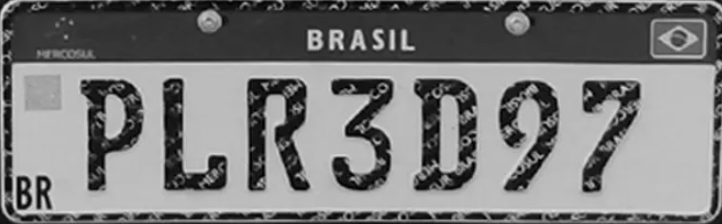

In [53]:
placa = imagem[y:y+h,x:x+w]
cv2_imshow(placa)

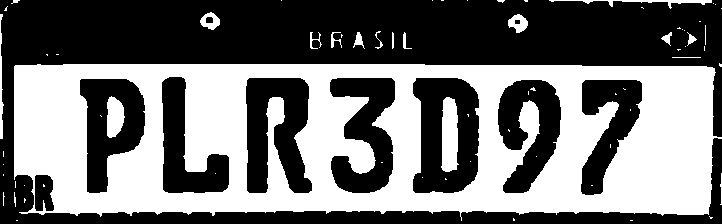

In [54]:
valor, lim_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
erosao = cv2.erode(lim_otsu, cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4)))
cv2_imshow(erosao)

In [58]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(erosao, lang='por', config=config_tesseract)
print(texto)

L PLR3D97



In [62]:
import re
texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)
print(texto_extraido.group(0))

PLR3D97


# Aplicação em outro cenário

In [63]:
imagem = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imagens placa de carro/placa_carro2.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

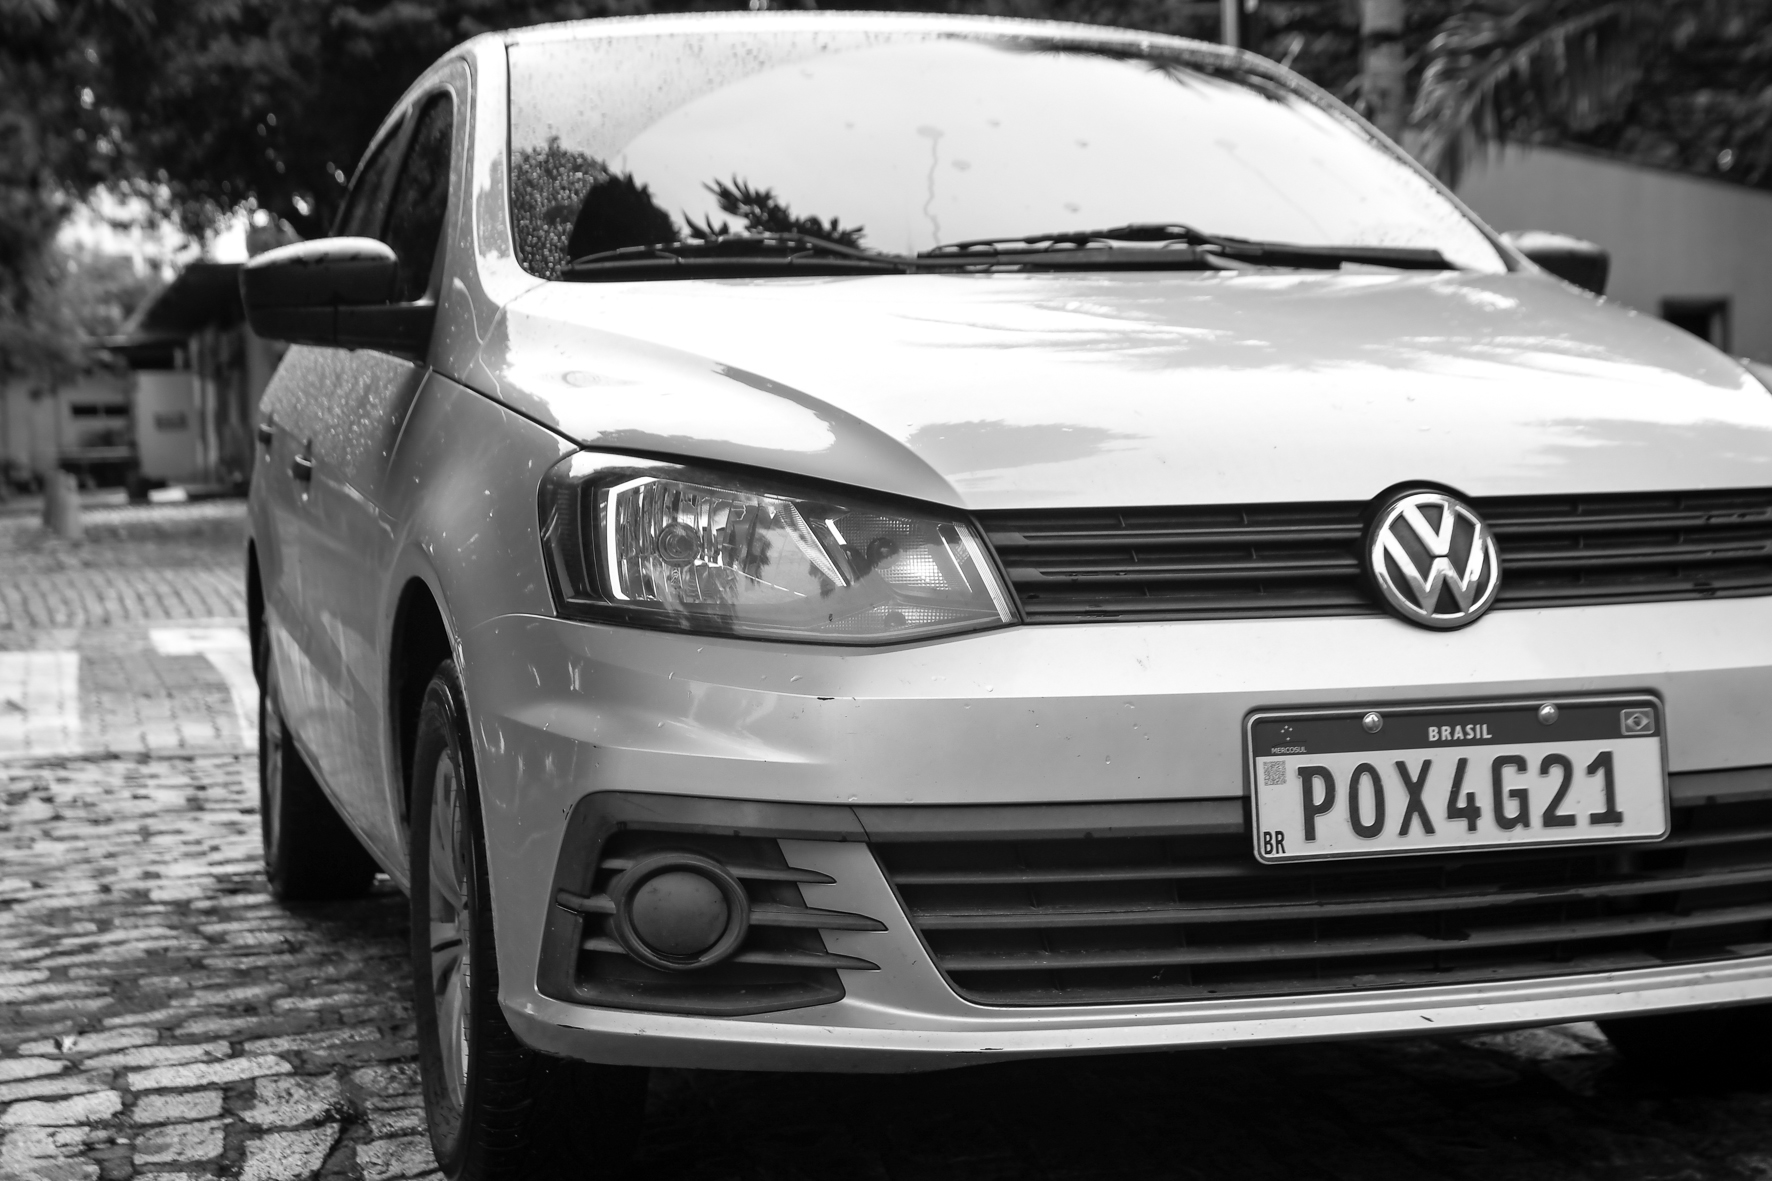

In [64]:
cv2_imshow(imagem)

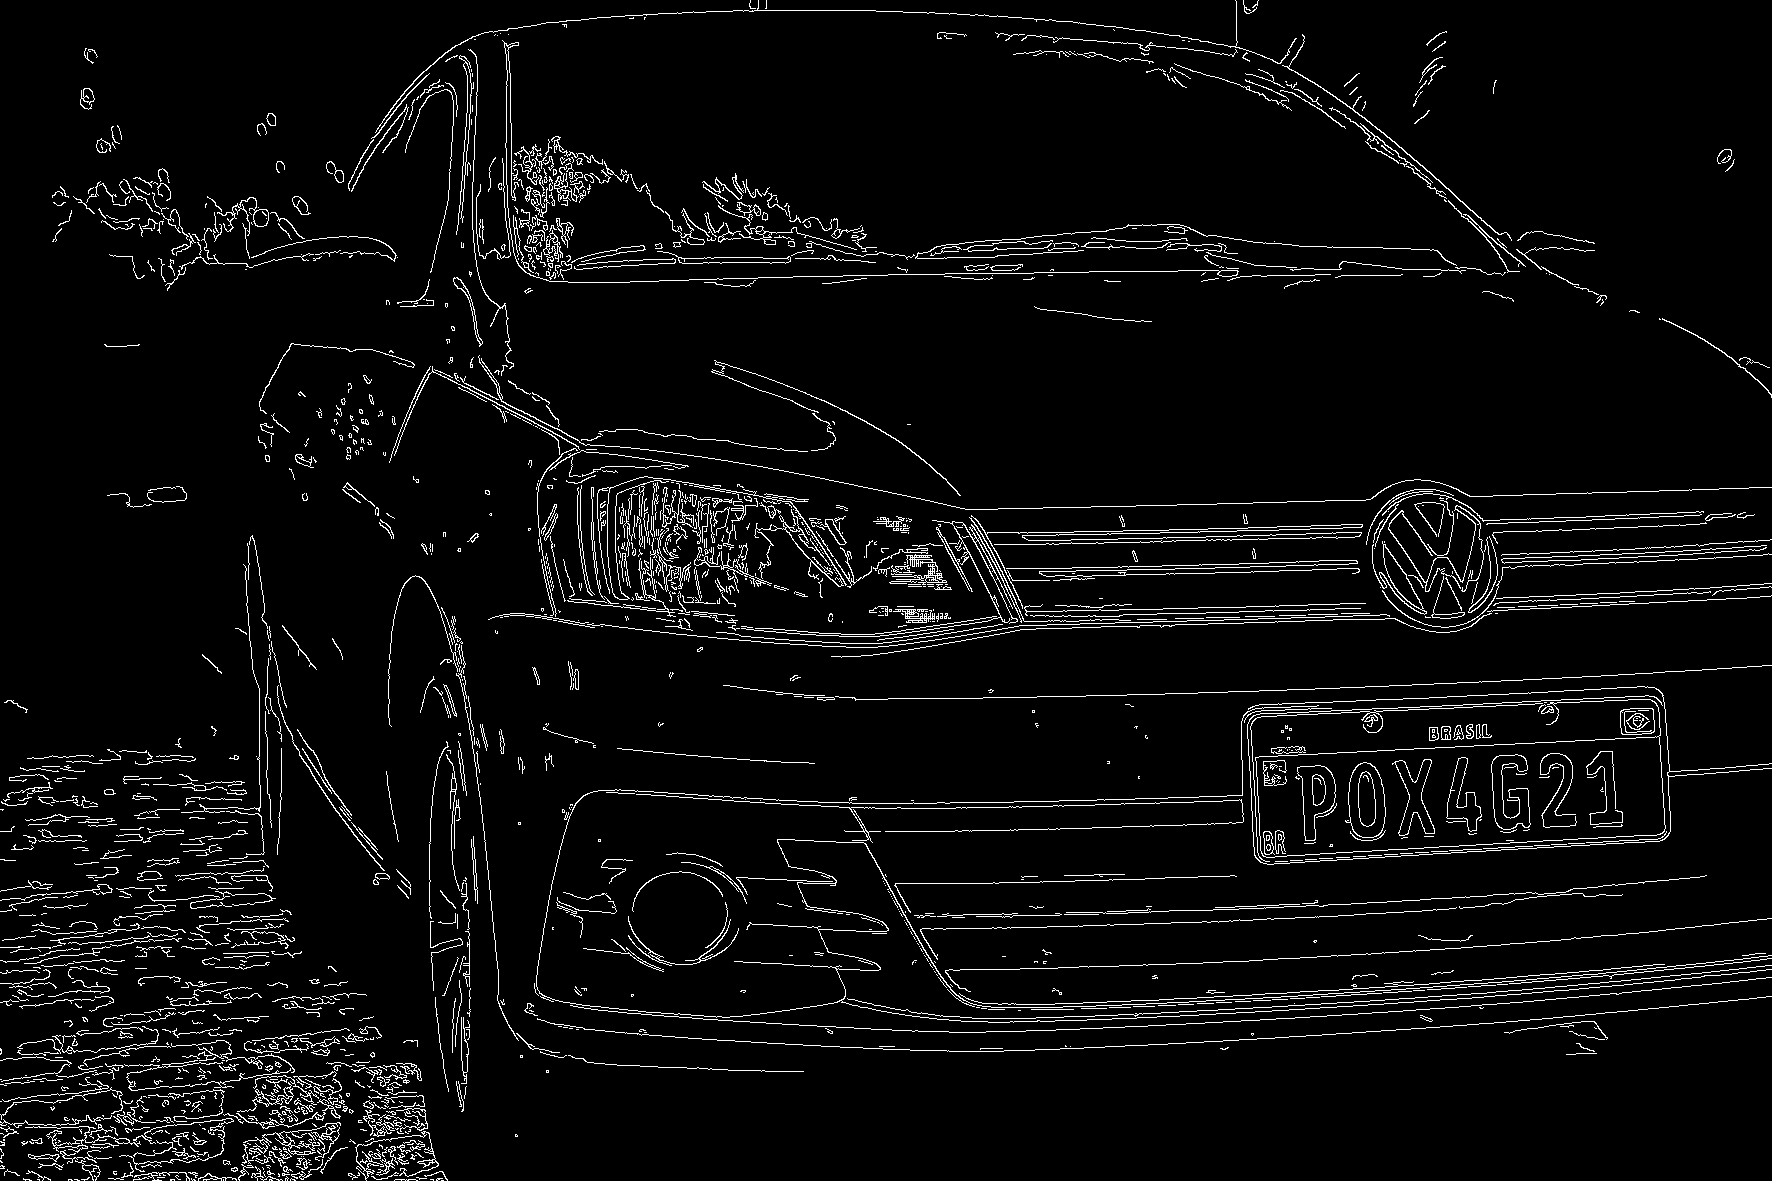

In [65]:
bordas = cv2.Canny(imagem, 100, 200)
cv2_imshow(bordas)

In [66]:
contornos, hierarquia = cv2.findContours(bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos = sorted(contornos, key = cv2.contourArea, reverse = True)[:10]

In [67]:
for contorno in contornos:
  epsilon = 0.02 * cv2.arcLength(contorno, True)
  aproximacao = cv2.approxPolyDP(contorno, epsilon, True)

  if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4: # 4 lados
    localizacao = aproximacao
    break

In [68]:
localizacao

array([[[1659,  737]],

       [[1656,  835]],

       [[1260,  850]],

       [[1259,  756]]], dtype=int32)

In [69]:
x, y, w, h = cv2.boundingRect(localizacao)

In [70]:
placa = imagem[y:y+h, x:x+w]

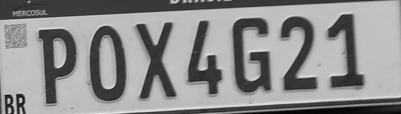

In [71]:
cv2_imshow(placa)

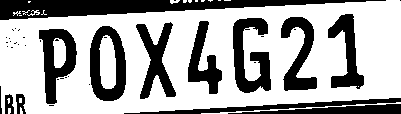

In [73]:
valor, lim_otsu = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(lim_otsu)

In [74]:
texto = pytesseract.image_to_string(lim_otsu, lang='por', config=config_tesseract)
print(texto)

“POX4G21



In [75]:
texto_extraido = re.search('\w{3}\d{1}\w{1}\d{2}', texto)
print(texto_extraido.group(0))

POX4G21
